In [ ]:
!pip install pandas-profiling==2.7.1
import sys
from pandas_profiling import ProfileReport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud


In [ ]:
Train = pd.read_csv("/content/train.csv")

In [ ]:
Train.head()

,animal_id_outcome,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,age_upon_outcome,date_of_birth,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,outcome_type
0,A006100,2007,7,10 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194,10 years,2007-07-09 00:00:00,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,Thursday,0,1.0,Return to Owner
1,A006100,2007,7,7 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,1,2555,7.0,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722,7 years,2007-07-09 00:00:00,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,Return to Owner
2,A006100,2007,7,6 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,1,2190,6.0,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889,6 years,2007-07-09 00:00:00,Neutered Male,2190,6.0,"(5.0, 7.5]",NaN,3,2014,2014-03,Saturday,17,3.0,Return to Owner
3,A047759,2004,4,10 years,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139,10 years,2004-04-02 00:00:00,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,Missing
4,A134067,1997,10,16 years,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,1,5840,16.0,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444,16 years,1997-10-16 00:00:00,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,Saturday,11,1.0,Return to Owner


In [ ]:
Train.describe()

,dob_year,dob_month,count,age_upon_intake_(days),age_upon_intake_(years),intake_month,intake_year,intake_hour,intake_number,time_in_shelter_days,age_upon_outcome_(days),age_upon_outcome_(years),outcome_month,outcome_year,outcome_hour,outcome_number
count,47803.000000,47803.000000,47803.0,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000
mean,2012.197728,6.337531,1.0,841.679915,2.305972,6.596113,2014.600046,13.549087,1.144552,17.143366,855.319729,2.343342,6.650587,2014.638893,14.381545,1.144552
std,3.068255,3.342038,0.0,1100.557953,3.015227,3.460172,0.905731,3.179397,0.500055,46.600727,1103.598596,3.023558,3.490263,0.912706,3.456145,0.500055
min,1992.000000,1.000000,1.0,0.000000,0.000000,1.000000,2013.000000,0.000000,1.000000,0.000694,0.000000,0.000000,1.000000,2013.000000,0.000000,1.000000
25%,2011.000000,4.000000,1.0,60.000000,0.164384,4.000000,2014.000000,11.000000,1.000000,1.049653,90.000000,0.246575,4.000000,2014.000000,12.000000,1.000000
50%,2013.000000,6.000000,1.0,365.000000,1.000000,7.000000,2015.000000,13.000000,1.000000,4.972222,365.000000,1.000000,7.000000,2015.000000,15.000000,1.000000
75%,2014.000000,9.000000,1.0,1095.000000,3.000000,10.000000,2015.000000,16.000000,1.000000,13.113889,1095.000000,3.000000,10.000000,2015.000000,17.000000,1.000000
max,2016.000000,12.000000,1.0,8030.000000,22.000000,12.000000,2018.000000,23.000000,13.000000,1606.194444,8030.000000,22.000000,12.000000,2018.000000,23.000000,13.000000


**Complete Profile Report**



In [ ]:
report = ProfileReport(Train)

In [ ]:
profile = ProfileReport(Train.drop(['count'],axis=1), minimal=True)
profile.to_file(output_file="output.html")


Summarize dataset:   0%|          | 0/43 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:

Train.shape

(47803, 37)

**Removal Of Duplicate Rows**

In [ ]:
duplicateRowsDF = Train[Train.duplicated()]
print(duplicateRowsDF)
Train.drop_duplicates(inplace=True)


      animal_id_outcome  dob_year  ...  outcome_number     outcome_type
6997            A668183      2013  ...             4.0  Return to Owner
27362           A695798      2014  ...             1.0       Euthanasia
27363           A695798      2014  ...             1.0       Euthanasia
28023           A696688      2012  ...             2.0         Adoption
28024           A696688      2012  ...             2.0         Adoption

[5 rows x 37 columns]


In [ ]:
duplicateRowsDF = Train[Train.duplicated()]
print(duplicateRowsDF)

Empty DataFrame
Columns: [animal_id_outcome, dob_year, dob_month, age_upon_intake, animal_type, breed, color, intake_condition, intake_type, sex_upon_intake, count, age_upon_intake_(days), age_upon_intake_(years), age_upon_intake_age_group, intake_datetime, intake_month, intake_year, intake_monthyear, intake_weekday, intake_hour, intake_number, time_in_shelter, time_in_shelter_days, age_upon_outcome, date_of_birth, sex_upon_outcome, age_upon_outcome_(days), age_upon_outcome_(years), age_upon_outcome_age_group, outcome_datetime, outcome_month, outcome_year, outcome_monthyear, outcome_weekday, outcome_hour, outcome_number, outcome_type]
Index: []


**Exploratory Data Analysis**

In [ ]:
def wordcloud(text):
  wordcloud = WordCloud(colormap="Dark2", width=600, height=300, max_font_size=100, max_words=40).generate(text)
  wordcloud.recolor(random_state=ind*312)
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis("off")
  plt.show()


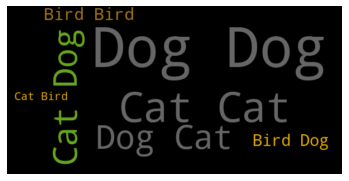

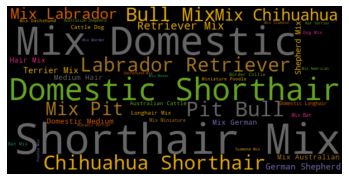

In [ ]:
animal_type_text = ""
breed_text = ""
for ind, row in Train.iterrows():
    animal_type_text += row["animal_type"] + " "
    breed_text +=row["breed"]+" "
animal_type_text = animal_type_text.strip()
breed_text=breed_text.strip()
wordcloud(animal_type_text)
wordcloud(breed_text)

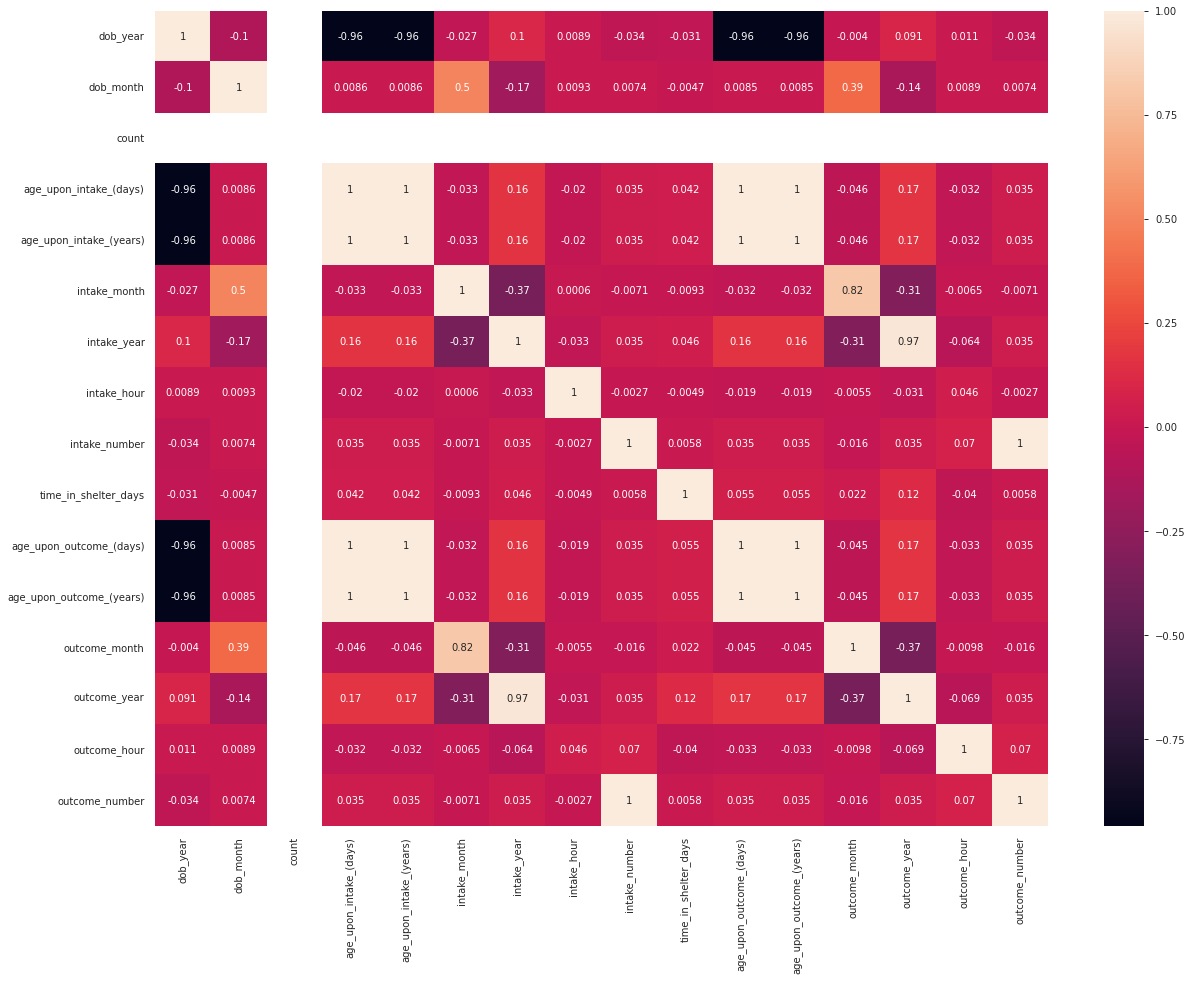

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
Train.corr()
plt.figure(figsize=(20,15))
sns.heatmap(Train.corr(), annot= True);

In [ ]:
Train.drop(['count'], axis=1, inplace=True)

**Feature Engineering**



In [ ]:
Train.isna().sum()

animal_id_outcome                0
dob_year                         0
dob_month                        0
age_upon_intake                  0
animal_type                      0
breed                            0
color                            0
intake_condition                 0
intake_type                      0
sex_upon_intake                  1
age_upon_intake_(days)           0
age_upon_intake_(years)          0
age_upon_intake_age_group        0
intake_datetime                  0
intake_month                     0
intake_year                      0
intake_monthyear                 0
intake_weekday                   0
intake_hour                      0
intake_number                    0
time_in_shelter                  0
time_in_shelter_days             0
age_upon_outcome                 0
date_of_birth                    0
sex_upon_outcome                 1
age_upon_outcome_(days)          0
age_upon_outcome_(years)         0
age_upon_outcome_age_group       0
outcome_datetime    

In [ ]:
{column: len(Train[column].unique()) for column in Train.columns}


{'age_upon_intake': 45,
 'age_upon_intake_(days)': 44,
 'age_upon_intake_(years)': 44,
 'age_upon_intake_age_group': 9,
 'age_upon_outcome': 45,
 'age_upon_outcome_(days)': 44,
 'age_upon_outcome_(years)': 44,
 'age_upon_outcome_age_group': 9,
 'animal_id_outcome': 42679,
 'animal_type': 4,
 'breed': 1847,
 'color': 443,
 'date_of_birth': 4958,
 'dob_month': 12,
 'dob_year': 25,
 'intake_condition': 8,
 'intake_datetime': 34456,
 'intake_hour': 24,
 'intake_month': 12,
 'intake_monthyear': 54,
 'intake_number': 13,
 'intake_type': 5,
 'intake_weekday': 7,
 'intake_year': 6,
 'outcome_datetime': 32714,
 'outcome_hour': 23,
 'outcome_month': 12,
 'outcome_monthyear': 55,
 'outcome_number': 13,
 'outcome_type': 9,
 'outcome_weekday': 7,
 'outcome_year': 6,
 'sex_upon_intake': 6,
 'sex_upon_outcome': 6,
 'time_in_shelter': 21083,
 'time_in_shelter_days': 21083}

In [ ]:
Train['animal_type'].unique()

array(['Dog', 'Cat', 'Other', 'Bird'], dtype=object)

In [ ]:
Train['intake_condition'].unique()

array(['Normal', 'Injured', 'Aged', 'Sick', 'Other', 'Feral', 'Pregnant',
       'Nursing'], dtype=object)

In [ ]:
Train['intake_type'].unique()

array(['Stray', 'Public Assist', 'Owner Surrender', 'Euthanasia Request',
       'Wildlife'], dtype=object)

In [ ]:
Train['sex_upon_intake'].unique()

array(['Neutered Male', 'Spayed Female', 'Intact Female', 'Intact Male',
       'Unknown', nan], dtype=object)

In [ ]:
Train['sex_upon_intake'].astype('str')

0        Neutered Male
1        Neutered Male
2        Neutered Male
3        Neutered Male
4        Neutered Male
             ...      
47798    Neutered Male
47799      Intact Male
47800    Spayed Female
47801      Intact Male
47802          Unknown
Name: sex_upon_intake, Length: 47798, dtype: object

In [ ]:
Train.head()

,animal_id_outcome,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,age_upon_outcome,date_of_birth,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,outcome_type
0,A006100,2007,7,10 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194,10 years,2007-07-09 00:00:00,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,Thursday,0,1.0,Return to Owner
1,A006100,2007,7,7 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722,7 years,2007-07-09 00:00:00,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,Return to Owner
2,A006100,2007,7,6 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889,6 years,2007-07-09 00:00:00,Neutered Male,2190,6.0,"(5.0, 7.5]",NaN,3,2014,2014-03,Saturday,17,3.0,Return to Owner
3,A047759,2004,4,10 years,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139,10 years,2004-04-02 00:00:00,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,Missing
4,A134067,1997,10,16 years,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444,16 years,1997-10-16 00:00:00,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,Saturday,11,1.0,Return to Owner


In [ ]:
Train.shape

(47798, 36)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
new_df = pd.read_csv('/content/train.csv',usecols=["animal_type", "breed","color","intake_condition","intake_type", "sex_upon_outcome","sex_upon_intake","intake_weekday","outcome_weekday"]) 
new_df.head()


,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,intake_weekday,sex_upon_outcome,outcome_weekday
0,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,Thursday,Neutered Male,Thursday
1,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,Friday,Neutered Male,Saturday
2,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,Friday,Neutered Male,Saturday
3,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,Wednesday,Neutered Male,Monday
4,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,Saturday,Neutered Male,Saturday


In [ ]:
for x in new_df.columns:
    #prinfting unique values
    print(x ,':', len(new_df[x].unique()))

animal_type : 4
breed : 1847
color : 443
intake_condition : 8
intake_type : 5
sex_upon_intake : 6
intake_weekday : 7
sex_upon_outcome : 6
outcome_weekday : 7


In [ ]:
new_df.animal_type.value_counts().sort_values(ascending=False).head(20)

Dog      28222
Cat      16951
Other     2458
Bird       172
Name: animal_type, dtype: int64

In [ ]:
top_10_A_T = [x for x in new_df.animal_type.value_counts().sort_values(ascending=False).head(10).index]
top_10_B = [x for x in new_df.breed.value_counts().sort_values(ascending=False).head(10).index]
top_10_C = [x for x in new_df.color.value_counts().sort_values(ascending=False).head(10).index]
top_10_I_C = [x for x in new_df.intake_condition.value_counts().sort_values(ascending=False).head(10).index]
top_10_I_T = [x for x in new_df.intake_type.value_counts().sort_values(ascending=False).head(10).index]
top_10_S_U_I = [x for x in new_df.sex_upon_intake.value_counts().sort_values(ascending=False).head(10).index]
top_10_I_W = [x for x in new_df.intake_weekday.value_counts().sort_values(ascending=False).head(10).index]
top_10_S_U_O = [x for x in new_df.sex_upon_outcome.value_counts().sort_values(ascending=False).head(10).index]
top_10_O_W = [x for x in new_df.outcome_weekday.value_counts().sort_values(ascending=False).head(10).index]

In [ ]:
def top_x(df2,variable,top_x_labels):
    for label in top_x_labels:
       df2[variable+'_'+label] = np.where(Train[variable]==label,1,0)
data = pd.read_csv('/content/train.csv',usecols=["animal_type", "breed","color","intake_condition","intake_type", "sex_upon_outcome","sex_upon_intake","intake_weekday","outcome_weekday"]) 
top_x(Train,'animal_type',top_10_A_T)
top_x(Train,'breed',top_10_B)
top_x(Train,'color',top_10_C)
top_x(Train,'intake_condition',top_10_I_C)
top_x(Train,'intake_type',top_10_I_T)
top_x(Train,'sex_upon_intake',top_10_S_U_I)
top_x(Train,'intake_weekday',top_10_I_W)
top_x(Train,'sex_upon_outcome',top_10_S_U_O)
top_x(Train,'outcome_weekday',top_10_O_W)
Train = Train.drop(["animal_id_outcome","animal_type","breed","color", "intake_condition","intake_type", "sex_upon_outcome","sex_upon_intake","intake_weekday","outcome_weekday"],axis=1)

Train.head()

,dob_year,dob_month,age_upon_intake,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,age_upon_outcome,date_of_birth,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_hour,outcome_number,outcome_type,animal_type_Dog,animal_type_Cat,animal_type_Other,animal_type_Bird,breed_Domestic Shorthair Mix,breed_Pit Bull Mix,breed_Chihuahua Shorthair Mix,breed_Labrador Retriever Mix,breed_Domestic Medium Hair Mix,breed_German Shepherd Mix,breed_Domestic Longhair Mix,breed_Bat Mix,breed_Australian Cattle Dog Mix,breed_Siamese Mix,...,color_Brown Tabby/White,color_Tricolor,color_Blue/White,intake_condition_Normal,intake_condition_Injured,intake_condition_Sick,intake_condition_Nursing,intake_condition_Aged,intake_condition_Other,intake_condition_Feral,intake_condition_Pregnant,intake_type_Stray,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Wildlife,intake_type_Euthanasia Request,sex_upon_intake_Intact Male,sex_upon_intake_Intact Female,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown,intake_weekday_Saturday,intake_weekday_Monday,intake_weekday_Wednesday,intake_weekday_Tuesday,intake_weekday_Friday,intake_weekday_Thursday,intake_weekday_Sunday,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Intact Female,sex_upon_outcome_Unknown,outcome_weekday_Saturday,outcome_weekday_Sunday,outcome_weekday_Monday,outcome_weekday_Tuesday,outcome_weekday_Friday,outcome_weekday_Wednesday,outcome_weekday_Thursday
0,2007,7,10 years,3650,10.0,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,14,1.0,0 days 14:07:00.000000000,0.588194,10 years,2007-07-09 00:00:00,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,0,1.0,Return to Owner,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2007,7,7 years,2555,7.0,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,10,2.0,1 days 06:14:00.000000000,1.259722,7 years,2007-07-09 00:00:00,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,16,2.0,Return to Owner,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,2007,7,6 years,2190,6.0,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,14,3.0,1 days 02:44:00.000000000,1.113889,6 years,2007-07-09 00:00:00,2190,6.0,"(5.0, 7.5]",NaN,3,2014,2014-03,17,3.0,Return to Owner,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,2004,4,10 years,3650,10.0,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,15,1.0,4 days 23:17:00.000000000,4.970139,10 years,2004-04-02 00:00:00,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,15,1.0,Missing,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1997,10,16 years,5840,16.0,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,9,1.0,0 days 02:52:00.000000000,0.119444,16 years,1997-10-16 00:00:00,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,11,1.0,Return to Owner,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [ ]:

def column_conversion(column):
    li = list(column.split(" "))
    return li[0]
Train['age_upon_intake'] = Train['age_upon_intake'].map(column_conversion)
Train['age_upon_outcome']=Train['age_upon_outcome'].map(column_conversion)

In [ ]:
Train.head()

,dob_year,dob_month,age_upon_intake,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,age_upon_outcome,date_of_birth,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_hour,outcome_number,outcome_type,animal_type_Dog,animal_type_Cat,animal_type_Other,animal_type_Bird,breed_Domestic Shorthair Mix,breed_Pit Bull Mix,breed_Chihuahua Shorthair Mix,breed_Labrador Retriever Mix,breed_Domestic Medium Hair Mix,breed_German Shepherd Mix,breed_Domestic Longhair Mix,breed_Bat Mix,breed_Australian Cattle Dog Mix,breed_Siamese Mix,...,color_Brown Tabby/White,color_Tricolor,color_Blue/White,intake_condition_Normal,intake_condition_Injured,intake_condition_Sick,intake_condition_Nursing,intake_condition_Aged,intake_condition_Other,intake_condition_Feral,intake_condition_Pregnant,intake_type_Stray,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Wildlife,intake_type_Euthanasia Request,sex_upon_intake_Intact Male,sex_upon_intake_Intact Female,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown,intake_weekday_Saturday,intake_weekday_Monday,intake_weekday_Wednesday,intake_weekday_Tuesday,intake_weekday_Friday,intake_weekday_Thursday,intake_weekday_Sunday,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Intact Female,sex_upon_outcome_Unknown,outcome_weekday_Saturday,outcome_weekday_Sunday,outcome_weekday_Monday,outcome_weekday_Tuesday,outcome_weekday_Friday,outcome_weekday_Wednesday,outcome_weekday_Thursday
0,2007,7,10,3650,10.0,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,14,1.0,0 days 14:07:00.000000000,0.588194,10,2007-07-09 00:00:00,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,0,1.0,Return to Owner,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2007,7,7,2555,7.0,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,10,2.0,1 days 06:14:00.000000000,1.259722,7,2007-07-09 00:00:00,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,16,2.0,Return to Owner,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,2007,7,6,2190,6.0,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,14,3.0,1 days 02:44:00.000000000,1.113889,6,2007-07-09 00:00:00,2190,6.0,"(5.0, 7.5]",NaN,3,2014,2014-03,17,3.0,Return to Owner,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,2004,4,10,3650,10.0,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,15,1.0,4 days 23:17:00.000000000,4.970139,10,2004-04-02 00:00:00,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,15,1.0,Missing,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1997,10,16,5840,16.0,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,9,1.0,0 days 02:52:00.000000000,0.119444,16,1997-10-16 00:00:00,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,11,1.0,Return to Owner,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
import datetime

In [ ]:
Train['intake_datetime_year'] = pd.to_datetime(Train.intake_datetime).apply(lambda x: x.year)
Train['intake_datetime_month'] = pd.to_datetime(Train.intake_datetime).apply(lambda x: x.month)
Train['intake_datetime_date'] = pd.to_datetime(Train.intake_datetime).apply(lambda x: x.day)
Train['intake_datetime_hour'] = pd.to_datetime(Train.intake_datetime).apply(lambda x: x.hour)
Train['intake_datetime_minute'] = pd.to_datetime(Train.intake_datetime).apply(lambda x: x.minute)


In [ ]:
Train['outcome_datetime_year'] = pd.to_datetime(Train.outcome_datetime).apply(lambda x: x.year)
Train['outcome_datetime_month'] = pd.to_datetime(Train.outcome_datetime).apply(lambda x: x.month)
Train['outcome_datetime_date'] = pd.to_datetime(Train.outcome_datetime).apply(lambda x: x.day)
Train['outcome_datetime_hour'] = pd.to_datetime(Train.outcome_datetime).apply(lambda x: x.hour)
Train['outcome_datetime_minute'] = pd.to_datetime(Train.outcome_datetime).apply(lambda x: x.minute)


In [ ]:

Train['date_of_birth_year'] = pd.to_datetime(Train.date_of_birth).apply(lambda x: x.year)
Train['date_of_birth_month'] = pd.to_datetime(Train.date_of_birth).apply(lambda x: x.month)
Train['date_of_birth_date'] = pd.to_datetime(Train.date_of_birth).apply(lambda x: x.day)
Train['date_of_birth_hour'] = pd.to_datetime(Train.date_of_birth).apply(lambda x: x.hour)
Train['date_of_birth_minute'] = pd.to_datetime(Train.date_of_birth).apply(lambda x: x.minute)

In [ ]:
Train.drop(['intake_datetime','outcome_datetime','date_of_birth'],axis=1,inplace = True)
Train.head()

,dob_year,dob_month,age_upon_intake,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_month,intake_year,intake_monthyear,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,age_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_month,outcome_year,outcome_monthyear,outcome_hour,outcome_number,outcome_type,animal_type_Dog,animal_type_Cat,animal_type_Other,animal_type_Bird,breed_Domestic Shorthair Mix,breed_Pit Bull Mix,breed_Chihuahua Shorthair Mix,breed_Labrador Retriever Mix,breed_Domestic Medium Hair Mix,breed_German Shepherd Mix,breed_Domestic Longhair Mix,breed_Bat Mix,breed_Australian Cattle Dog Mix,breed_Siamese Mix,color_Black/White,color_Black,color_Brown Tabby,...,intake_type_Euthanasia Request,sex_upon_intake_Intact Male,sex_upon_intake_Intact Female,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown,intake_weekday_Saturday,intake_weekday_Monday,intake_weekday_Wednesday,intake_weekday_Tuesday,intake_weekday_Friday,intake_weekday_Thursday,intake_weekday_Sunday,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Intact Female,sex_upon_outcome_Unknown,outcome_weekday_Saturday,outcome_weekday_Sunday,outcome_weekday_Monday,outcome_weekday_Tuesday,outcome_weekday_Friday,outcome_weekday_Wednesday,outcome_weekday_Thursday,intake_datetime_year,intake_datetime_month,intake_datetime_date,intake_datetime_hour,intake_datetime_minute,outcome_datetime_year,outcome_datetime_month,outcome_datetime_date,outcome_datetime_hour,outcome_datetime_minute,date_of_birth_year,date_of_birth_month,date_of_birth_date,date_of_birth_hour,date_of_birth_minute
0,2007,7,10,3650,10.0,"(7.5, 10.0]",12,2017,2017-12,14,1.0,0 days 14:07:00.000000000,0.588194,10,3650,10.0,"(7.5, 10.0]",12,2017,2017-12,0,1.0,Return to Owner,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,2017,12,7,0,0,2017.0,12.0,7.0,14.0,7.0,2007,7,9,0,0
1,2007,7,7,2555,7.0,"(5.0, 7.5]",12,2014,2014-12,10,2.0,1 days 06:14:00.000000000,1.259722,7,2555,7.0,"(5.0, 7.5]",12,2014,2014-12,16,2.0,Return to Owner,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2014,12,19,10,21,2014.0,12.0,20.0,16.0,35.0,2007,7,9,0,0
2,2007,7,6,2190,6.0,"(5.0, 7.5]",3,2014,2014-03,14,3.0,1 days 02:44:00.000000000,1.113889,6,2190,6.0,"(5.0, 7.5]",3,2014,2014-03,17,3.0,Return to Owner,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2014,3,7,14,26,NaN,NaN,NaN,NaN,NaN,2007,7,9,0,0
3,2004,4,10,3650,10.0,"(7.5, 10.0]",4,2014,2014-04,15,1.0,4 days 23:17:00.000000000,4.970139,10,3650,10.0,"(7.5, 10.0]",4,2014,2014-04,15,1.0,Missing,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2014,4,2,15,55,2014.0,4.0,7.0,15.0,12.0,2004,4,2,0,0
4,1997,10,16,5840,16.0,"(15.0, 17.5]",11,2013,2013-11,9,1.0,0 days 02:52:00.000000000,0.119444,16,5840,16.0,"(15.0, 17.5]",11,2013,2013-11,11,1.0,Return to Owner,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2013,11,16,9,2,2013.0,11.0,16.0,11.0,54.0,1997,10,16,0,0


In [ ]:
def monthyear_conversion_year(column):
  li = list(column.split("-"))
  return li[0]
def monthyear_conversion_month(column):
  li = list(column.split("-"))
  return li[1]
Train['outcome_monthyear_year'] = Train['outcome_monthyear'].map(monthyear_conversion_year)
Train['intake_monthyear_year']=Train['intake_monthyear'].map(monthyear_conversion_year)
Train['outcome_monthyear_month'] = Train['outcome_monthyear'].map(monthyear_conversion_month)
Train['intake_monthyear_month']=Train['intake_monthyear'].map(monthyear_conversion_month)
Train=Train.drop(['outcome_monthyear','intake_monthyear'],axis=1)
Train.head()


,dob_year,dob_month,age_upon_intake,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_month,intake_year,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,age_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_month,outcome_year,outcome_hour,outcome_number,outcome_type,animal_type_Dog,animal_type_Cat,animal_type_Other,animal_type_Bird,breed_Domestic Shorthair Mix,breed_Pit Bull Mix,breed_Chihuahua Shorthair Mix,breed_Labrador Retriever Mix,breed_Domestic Medium Hair Mix,breed_German Shepherd Mix,breed_Domestic Longhair Mix,breed_Bat Mix,breed_Australian Cattle Dog Mix,breed_Siamese Mix,color_Black/White,color_Black,color_Brown Tabby,color_Brown,color_White,...,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown,intake_weekday_Saturday,intake_weekday_Monday,intake_weekday_Wednesday,intake_weekday_Tuesday,intake_weekday_Friday,intake_weekday_Thursday,intake_weekday_Sunday,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Intact Female,sex_upon_outcome_Unknown,outcome_weekday_Saturday,outcome_weekday_Sunday,outcome_weekday_Monday,outcome_weekday_Tuesday,outcome_weekday_Friday,outcome_weekday_Wednesday,outcome_weekday_Thursday,intake_datetime_year,intake_datetime_month,intake_datetime_date,intake_datetime_hour,intake_datetime_minute,outcome_datetime_year,outcome_datetime_month,outcome_datetime_date,outcome_datetime_hour,outcome_datetime_minute,date_of_birth_year,date_of_birth_month,date_of_birth_date,date_of_birth_hour,date_of_birth_minute,outcome_monthyear_year,intake_monthyear_year,outcome_monthyear_month,intake_monthyear_month
0,2007,7,10,3650,10.0,"(7.5, 10.0]",12,2017,14,1.0,0 days 14:07:00.000000000,0.588194,10,3650,10.0,"(7.5, 10.0]",12,2017,0,1.0,Return to Owner,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,2017,12,7,0,0,2017.0,12.0,7.0,14.0,7.0,2007,7,9,0,0,2017,2017,12,12
1,2007,7,7,2555,7.0,"(5.0, 7.5]",12,2014,10,2.0,1 days 06:14:00.000000000,1.259722,7,2555,7.0,"(5.0, 7.5]",12,2014,16,2.0,Return to Owner,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2014,12,19,10,21,2014.0,12.0,20.0,16.0,35.0,2007,7,9,0,0,2014,2014,12,12
2,2007,7,6,2190,6.0,"(5.0, 7.5]",3,2014,14,3.0,1 days 02:44:00.000000000,1.113889,6,2190,6.0,"(5.0, 7.5]",3,2014,17,3.0,Return to Owner,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2014,3,7,14,26,NaN,NaN,NaN,NaN,NaN,2007,7,9,0,0,2014,2014,03,03
3,2004,4,10,3650,10.0,"(7.5, 10.0]",4,2014,15,1.0,4 days 23:17:00.000000000,4.970139,10,3650,10.0,"(7.5, 10.0]",4,2014,15,1.0,Missing,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2014,4,2,15,55,2014.0,4.0,7.0,15.0,12.0,2004,4,2,0,0,2014,2014,04,04
4,1997,10,16,5840,16.0,"(15.0, 17.5]",11,2013,9,1.0,0 days 02:52:00.000000000,0.119444,16,5840,16.0,"(15.0, 17.5]",11,2013,11,1.0,Return to Owner,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2013,11,16,9,2,2013.0,11.0,16.0,11.0,54.0,1997,10,16,0,0,2013,2013,11,11


In [ ]:
def  age_group_conversion_lower_limit(column):
  column=column.replace('(',' ')
  column=column.replace(']',' ')
  li = list(column.split(","))
  return li[0]
def  age_group_conversion_upper_limit(column):
  column=column.replace('(',' ')
  column=column.replace(']',' ')
  li = list(column.split(","))
  return li[1]
Train['age_upon_intake_age_group_lower'] = Train['age_upon_intake_age_group'].map( age_group_conversion_lower_limit)
Train['age_upon_intake_age_group_upper']=Train['age_upon_intake_age_group'].map(age_group_conversion_upper_limit)
Train['age_upon_outcome_age_group_lower'] = Train['age_upon_outcome_age_group'].map(age_group_conversion_lower_limit)
Train['age_upon_outcome_age_group_upper']=Train['age_upon_outcome_age_group'].map(age_group_conversion_upper_limit)
Train=Train.drop(['age_upon_intake_age_group','age_upon_outcome_age_group','time_in_shelter'],axis=1)


**Missing_Values**

In [ ]:
Train.isna().sum()

dob_year                            0
dob_month                           0
age_upon_intake                     0
age_upon_intake_(days)              0
age_upon_intake_(years)             0
                                   ..
intake_monthyear_month              0
age_upon_intake_age_group_lower     0
age_upon_intake_age_group_upper     0
age_upon_outcome_age_group_lower    0
age_upon_outcome_age_group_upper    0
Length: 102, dtype: int64

In [ ]:

for column in ['outcome_datetime_year', 'outcome_datetime_date', 'outcome_datetime_hour','outcome_datetime_month', 'outcome_datetime_minute']:
        Train[column] = Train[column].fillna(Train[column].mean())
    

In [ ]:
Train.head()


,dob_year,dob_month,age_upon_intake,age_upon_intake_(days),age_upon_intake_(years),intake_month,intake_year,intake_hour,intake_number,time_in_shelter_days,age_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),outcome_month,outcome_year,outcome_hour,outcome_number,outcome_type,animal_type_Dog,animal_type_Cat,animal_type_Other,animal_type_Bird,breed_Domestic Shorthair Mix,breed_Pit Bull Mix,breed_Chihuahua Shorthair Mix,breed_Labrador Retriever Mix,breed_Domestic Medium Hair Mix,breed_German Shepherd Mix,breed_Domestic Longhair Mix,breed_Bat Mix,breed_Australian Cattle Dog Mix,breed_Siamese Mix,color_Black/White,color_Black,color_Brown Tabby,color_Brown,color_White,color_Brown/White,color_Tan/White,color_Brown Tabby/White,...,intake_weekday_Wednesday,intake_weekday_Tuesday,intake_weekday_Friday,intake_weekday_Thursday,intake_weekday_Sunday,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Intact Female,sex_upon_outcome_Unknown,outcome_weekday_Saturday,outcome_weekday_Sunday,outcome_weekday_Monday,outcome_weekday_Tuesday,outcome_weekday_Friday,outcome_weekday_Wednesday,outcome_weekday_Thursday,intake_datetime_year,intake_datetime_month,intake_datetime_date,intake_datetime_hour,intake_datetime_minute,outcome_datetime_year,outcome_datetime_month,outcome_datetime_date,outcome_datetime_hour,outcome_datetime_minute,date_of_birth_year,date_of_birth_month,date_of_birth_date,date_of_birth_hour,date_of_birth_minute,outcome_monthyear_year,intake_monthyear_year,outcome_monthyear_month,intake_monthyear_month,age_upon_intake_age_group_lower,age_upon_intake_age_group_upper,age_upon_outcome_age_group_lower,age_upon_outcome_age_group_upper
0,2007,7,10,3650,10.0,12,2017,14,1.0,0.588194,10,3650,10.0,12,2017,0,1.0,Return to Owner,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,2017,12,7,0,0,2017.000000,12.00000,7.000000,14.000000,7.000000,2007,7,9,0,0,2017,2017,12,12,7.5,10.0,7.5,10.0
1,2007,7,7,2555,7.0,12,2014,10,2.0,1.259722,7,2555,7.0,12,2014,16,2.0,Return to Owner,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2014,12,19,10,21,2014.000000,12.00000,20.000000,16.000000,35.000000,2007,7,9,0,0,2014,2014,12,12,5.0,7.5,5.0,7.5
2,2007,7,6,2190,6.0,3,2014,14,3.0,1.113889,6,2190,6.0,3,2014,17,3.0,Return to Owner,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2014,3,7,14,26,2014.640195,6.65963,15.819613,14.409178,27.937845,2007,7,9,0,0,2014,2014,03,03,5.0,7.5,5.0,7.5
3,2004,4,10,3650,10.0,4,2014,15,1.0,4.970139,10,3650,10.0,4,2014,15,1.0,Missing,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2014,4,2,15,55,2014.000000,4.00000,7.000000,15.000000,12.000000,2004,4,2,0,0,2014,2014,04,04,7.5,10.0,7.5,10.0
4,1997,10,16,5840,16.0,11,2013,9,1.0,0.119444,16,5840,16.0,11,2013,11,1.0,Return to Owner,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2013,11,16,9,2,2013.000000,11.00000,16.000000,11.000000,54.000000,1997,10,16,0,0,2013,2013,11,11,15.0,17.5,15.0,17.5


In [ ]:

Train['outcome_type'].unique()

array(['Return to Owner', 'Missing', 'Transfer', 'Adoption', 'Euthanasia',
       'Rto-Adopt', 'Relocate', 'Died', 'Disposal'], dtype=object)

In [ ]:
Train_Target= Train['outcome_type'].values

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
Train = preprocessing.StandardScaler().fit(Train.drop(['outcome_type'],axis=1)).transform(Train.drop(['outcome_type'],axis=1))

In [ ]:


Train.shape



(47798, 101)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(Train, Train_Target, test_size=0.30, random_state=42)

In [ ]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_val.shape,  y_val.shape)

Train set: (33458, 101) (33458,)
Test set: (14340, 101) (14340,)


In [ ]:

# def draw_confusion_matrix(cm):
#     plt.figure(figsize=(12,8))
#     sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
#     plt.title("Confusion Matrix")
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
#     plt.show()

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, confusion_matrix

# logreg = LogisticRegression(random_state=42,C=0.01, solver='liblinear')
# logreg.fit(X_train, y_train)

# y_predict_train_logreg = logreg.predict(X_train)
# y_predict_test_logreg = logreg.predict(X_val)

# train_accuracy_score_logreg = accuracy_score(y_train, y_predict_train_logreg)
# test_accuracy_score_logreg = accuracy_score(y_val, y_predict_test_logreg)

# print(train_accuracy_score_logreg)
# print(test_accuracy_score_logreg)

In [ ]:
# cm_logreg = confusion_matrix(y_val,y_predict_test_logreg)
# draw_confusion_matrix(cm_logreg)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix

# rf = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=6, criterion = 'entropy', 
#                             min_samples_leaf= 1,min_samples_split= 2)
# rf.fit(X_train, y_train)

# y_predict_train_rf = rf.predict(X_train)
# y_predict_test_rf = rf.predict(X_val)

# train_accuracy_score_rf = accuracy_score(y_train, y_predict_train_rf)
# test_accuracy_score_rf = accuracy_score(y_val, y_predict_test_rf)

# print(train_accuracy_score_rf)
# print(test_accuracy_score_rf)


In [ ]:
# from sklearn.linear_model import LogisticRegression

# # Set regularization rate
# reg = 0.1

# # train a logistic regression model on the training set
# multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(X_train, y_train)
# print (multi_model)

In [ ]:
# predictions = multi_model.predict(X_val)
# print('Predicted labels: ', predictions[:15])
# print('Actual labels   : ' ,y_val[:15])

In [ ]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score

# print("Overall Accuracy:",accuracy_score(y_val, predictions))
# print("Overall Precision:",precision_score(y_val, predictions, average='macro'))
# print("Overall Recall:",recall_score(y_val, predictions, average='macro'))

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import metrics

# #Get best K
# Ks = 11
# mean_acc = np.zeros((Ks-1))
# std_acc = np.zeros((Ks-1))
# ConfusionMx = [];
# for n in range(1,Ks):
    
#     #Train Model and Predict  
#     neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
#     yhat=neigh.predict(X_val)
#     mean_acc[n-1] = metrics.accuracy_score(y_val, yhat)

    
#     std_acc[n-1]=np.std(yhat==y_val)/np.sqrt(yhat.shape[0])

# mean_acc


In [ ]:
# plt.plot(range(1,Ks),mean_acc,'g')
# plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
# plt.ylabel('Accuracy ')
# plt.xlabel('Number of Neighbors (K)')
# plt.tight_layout()
# plt.show()
# print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1)

In [ ]:
# k = 10

# knn = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
# # yhat = knn.predict(X_val)

In [ ]:
# print("Train Set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
# print("Test Set Accuracy: ", metrics.accuracy_score(y_val, yhat))

**Logistic Regression**

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix
# LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
# LR


In [ ]:
# y_pred_lr = LR.predict(X_val)
# predictions_lr = [(value) for value in y_pred_lr]
# print(predictions_lr)

In [ ]:
# print("Train Set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
# accuracy_lr = accuracy_score(y_val, predictions_lr)
# print("Accuracy: %.2f%%" % (accuracy_lr * 100.0))

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_xgb = model_xgb.predict(X_val)
predictions_xgb = [(value) for value in y_pred_xgb]
print(predictions_xgb)

['Transfer', 'Transfer', 'Transfer', 'Adoption', 'Return to Owner', 'Euthanasia', 'Adoption', 'Adoption', 'Adoption', 'Return to Owner', 'Adoption', 'Transfer', 'Return to Owner', 'Adoption', 'Transfer', 'Adoption', 'Return to Owner', 'Adoption', 'Adoption', 'Return to Owner', 'Transfer', 'Adoption', 'Adoption', 'Transfer', 'Adoption', 'Return to Owner', 'Transfer', 'Return to Owner', 'Transfer', 'Adoption', 'Adoption', 'Adoption', 'Return to Owner', 'Return to Owner', 'Adoption', 'Return to Owner', 'Return to Owner', 'Transfer', 'Return to Owner', 'Return to Owner', 'Adoption', 'Euthanasia', 'Transfer', 'Adoption', 'Adoption', 'Adoption', 'Euthanasia', 'Adoption', 'Transfer', 'Adoption', 'Transfer', 'Adoption', 'Euthanasia', 'Adoption', 'Adoption', 'Return to Owner', 'Adoption', 'Transfer', 'Adoption', 'Adoption', 'Transfer', 'Transfer', 'Adoption', 'Adoption', 'Transfer', 'Return to Owner', 'Adoption', 'Adoption', 'Transfer', 'Adoption', 'Transfer', 'Return to Owner', 'Euthanasia', '

In [ ]:


accuracy_xgb = accuracy_score(y_val, predictions_xgb)
print("Accuracy: %.2f%%" % (accuracy_xgb * 100.0))

Accuracy: 62.17%


In [ ]:
test = pd.read_csv("/content/test.csv")

In [ ]:
test.shape

(31869, 36)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
new_df_test = pd.read_csv('/content/test.csv',usecols=["animal_type", "breed","color","intake_condition","intake_type", "sex_upon_outcome","sex_upon_intake","intake_weekday","outcome_weekday"]) 
new_df_test.head()

,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,intake_weekday,sex_upon_outcome,outcome_weekday
0,Cat,Domestic Shorthair Mix,Brown Tabby,Nursing,Stray,Intact Female,Sunday,Spayed Female,Friday
1,Cat,Domestic Shorthair Mix,Brown Tabby,Nursing,Stray,Intact Female,Sunday,Spayed Female,Saturday
2,Cat,Domestic Shorthair Mix,Brown Tabby,Nursing,Stray,Intact Male,Sunday,Neutered Male,Friday
3,Cat,Domestic Shorthair Mix,Brown Tabby,Nursing,Stray,Intact Female,Sunday,Intact Female,Wednesday
4,Cat,Domestic Shorthair Mix,Blue Tabby,Nursing,Stray,Intact Female,Sunday,Intact Female,Tuesday


In [ ]:
new_df_test.shape

(31869, 9)

In [ ]:
for x in new_df_test.columns:
    print(x ,':', len(new_df_test[x].unique()))

animal_type : 4
breed : 1086
color : 387
intake_condition : 8
intake_type : 5
sex_upon_intake : 5
intake_weekday : 7
sex_upon_outcome : 5
outcome_weekday : 7


In [ ]:
top_10_A_T_test = [x for x in new_df_test.animal_type.value_counts().sort_values(ascending=False).head(10).index]
top_10_B_test = [x for x in new_df_test.breed.value_counts().sort_values(ascending=False).head(10).index]
top_10_C_test = [x for x in new_df_test.color.value_counts().sort_values(ascending=False).head(10).index]
top_10_I_C_test = [x for x in new_df_test.intake_condition.value_counts().sort_values(ascending=False).head(10).index]
top_10_I_T_test = [x for x in new_df_test.intake_type.value_counts().sort_values(ascending=False).head(10).index]
top_10_S_U_I_test = [x for x in new_df_test.sex_upon_intake.value_counts().sort_values(ascending=False).head(5).index]
top_10_I_W_test = [x for x in new_df_test.intake_weekday.value_counts().sort_values(ascending=False).head(10).index]
top_10_S_U_O_test = [x for x in new_df_test.sex_upon_outcome.value_counts().sort_values(ascending=False).head(5).index]
top_10_O_W_test = [x for x in new_df_test.outcome_weekday.value_counts().sort_values(ascending=False).head(10).index]

In [ ]:
def top_x(df2,variable,top_x_labels):
    for label in top_x_labels:
       df2[variable+'_'+label] = np.where(test[variable]==label,1,0)
data_test = pd.read_csv('/content/test.csv',usecols=["animal_type", "breed","color","intake_condition","intake_type", "sex_upon_outcome","sex_upon_intake","intake_weekday","outcome_weekday"]) 
top_x(test,'animal_type',top_10_A_T_test)
top_x(test,'breed',top_10_B_test)
top_x(test,'color',top_10_C_test)
top_x(test,'intake_condition',top_10_I_C_test)
top_x(test,'intake_type',top_10_I_T_test)
top_x(test,'sex_upon_intake',top_10_S_U_I_test)
top_x(test,'intake_weekday',top_10_I_W_test)
top_x(test,'sex_upon_outcome',top_10_S_U_O_test)
top_x(test,'outcome_weekday',top_10_O_W_test)
test = test.drop(["animal_type","breed","color", "intake_condition","intake_type", "sex_upon_outcome","sex_upon_intake","intake_weekday","outcome_weekday"],axis=1)
test.head()

,animal_id_outcome,dob_year,dob_month,age_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,age_upon_outcome,date_of_birth,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_hour,outcome_number,animal_type_Dog,animal_type_Cat,animal_type_Other,animal_type_Bird,breed_Domestic Shorthair Mix,breed_Pit Bull Mix,breed_Labrador Retriever Mix,breed_Chihuahua Shorthair Mix,breed_Domestic Medium Hair Mix,breed_German Shepherd Mix,breed_Bat Mix,breed_Australian Cattle Dog Mix,breed_Domestic Longhair Mix,...,color_Orange Tabby,color_Brown Tabby/White,color_Tan,intake_condition_Normal,intake_condition_Injured,intake_condition_Sick,intake_condition_Nursing,intake_condition_Aged,intake_condition_Other,intake_condition_Feral,intake_condition_Pregnant,intake_type_Stray,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Wildlife,intake_type_Euthanasia Request,sex_upon_intake_Intact Male,sex_upon_intake_Intact Female,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown,intake_weekday_Monday,intake_weekday_Saturday,intake_weekday_Tuesday,intake_weekday_Thursday,intake_weekday_Wednesday,intake_weekday_Friday,intake_weekday_Sunday,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Intact Female,sex_upon_outcome_Unknown,outcome_weekday_Saturday,outcome_weekday_Tuesday,outcome_weekday_Sunday,outcome_weekday_Monday,outcome_weekday_Friday,outcome_weekday_Thursday,outcome_weekday_Wednesday
0,A723133,2013,3,3 years,1,1095,3.000000,"(2.5, 5.0]",27-03-2016 11:31,3,2016,2016-03,11,1,5 days 04:48:00.000000000,5.200000,3 years,27-03-2013 00:00,1095,3.000000,"(2.5, 5.0]",01-04-2016 16:19,4,2016,2016-04,16,1,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,A723134,2016,2,4 weeks,1,28,0.076712,"(-0.025, 2.5]",27-03-2016 11:31,3,2016,2016-03,11,1,34 days 06:11:00.000000000,34.257639,2 months,27-02-2016 00:00,60,0.164384,"(-0.025, 2.5]",30-04-2016 17:42,4,2016,2016-04,17,1,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
2,A723135,2016,2,4 weeks,1,28,0.076712,"(-0.025, 2.5]",27-03-2016 11:31,3,2016,2016-03,11,1,32 days 12:29:00.000000000,32.520139,2 months,27-02-2016 00:00,60,0.164384,"(-0.025, 2.5]",29-04-2016 00:00,4,2016,2016-04,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
3,A723136,2016,2,4 weeks,1,28,0.076712,"(-0.025, 2.5]",27-03-2016 11:31,3,2016,2016-03,11,1,31 days 02:16:00.000000000,31.094444,1 month,27-02-2016 00:00,30,0.082192,"(-0.025, 2.5]",27-04-2016 13:47,4,2016,2016-04,13,1,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,A723137,2016,2,4 weeks,1,28,0.076712,"(-0.025, 2.5]",27-03-2016 11:31,3,2016,2016-03,11,1,37 days 00:11:00.000000000,37.007639,2 months,27-02-2016 00:00,60,0.164384,"(-0.025, 2.5]",03-05-2016 11:42,5,2016,2016-05,11,1,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
test['age_upon_intake'] = test['age_upon_intake'].map(column_conversion)
test['age_upon_outcome']=test['age_upon_outcome'].map(column_conversion)

In [ ]:
test['intake_datetime_year'] = pd.to_datetime(test.intake_datetime).apply(lambda x: x.year)
test['intake_datetime_month'] = pd.to_datetime(test.intake_datetime).apply(lambda x: x.month)
test['intake_datetime_date'] = pd.to_datetime(test.intake_datetime).apply(lambda x: x.day)
test['intake_datetime_hour'] = pd.to_datetime(test.intake_datetime).apply(lambda x: x.hour)
test['intake_datetime_minute'] = pd.to_datetime(test.intake_datetime).apply(lambda x: x.minute)

In [ ]:
test['outcome_datetime_year'] = pd.to_datetime(test.outcome_datetime).apply(lambda x: x.year)
test['outcome_datetime_month'] = pd.to_datetime(test.outcome_datetime).apply(lambda x: x.month)
test['outcome_datetime_date'] = pd.to_datetime(test.outcome_datetime).apply(lambda x: x.day)
test['outcome_datetime_hour'] = pd.to_datetime(test.outcome_datetime).apply(lambda x: x.hour)
test['outcome_datetime_minute'] = pd.to_datetime(test.outcome_datetime).apply(lambda x: x.minute)


In [ ]:
test['date_of_birth_year'] = pd.to_datetime(test.date_of_birth).apply(lambda x: x.year)
test['date_of_birth_month'] = pd.to_datetime(test.date_of_birth).apply(lambda x: x.month)
test['date_of_birth_date'] = pd.to_datetime(test.date_of_birth).apply(lambda x: x.day)
test['date_of_birth_hour'] = pd.to_datetime(test.date_of_birth).apply(lambda x: x.hour)
test['date_of_birth_minute'] = pd.to_datetime(test.date_of_birth).apply(lambda x: x.minute)

In [ ]:
test.drop(['intake_datetime','outcome_datetime','date_of_birth'],axis=1,inplace = True)
test.head()

,animal_id_outcome,dob_year,dob_month,age_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_month,intake_year,intake_monthyear,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,age_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_month,outcome_year,outcome_monthyear,outcome_hour,outcome_number,animal_type_Dog,animal_type_Cat,animal_type_Other,animal_type_Bird,breed_Domestic Shorthair Mix,breed_Pit Bull Mix,breed_Labrador Retriever Mix,breed_Chihuahua Shorthair Mix,breed_Domestic Medium Hair Mix,breed_German Shepherd Mix,breed_Bat Mix,breed_Australian Cattle Dog Mix,breed_Domestic Longhair Mix,breed_Siamese Mix,color_Black/White,color_Black,...,intake_type_Euthanasia Request,sex_upon_intake_Intact Male,sex_upon_intake_Intact Female,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown,intake_weekday_Monday,intake_weekday_Saturday,intake_weekday_Tuesday,intake_weekday_Thursday,intake_weekday_Wednesday,intake_weekday_Friday,intake_weekday_Sunday,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Intact Female,sex_upon_outcome_Unknown,outcome_weekday_Saturday,outcome_weekday_Tuesday,outcome_weekday_Sunday,outcome_weekday_Monday,outcome_weekday_Friday,outcome_weekday_Thursday,outcome_weekday_Wednesday,intake_datetime_year,intake_datetime_month,intake_datetime_date,intake_datetime_hour,intake_datetime_minute,outcome_datetime_year,outcome_datetime_month,outcome_datetime_date,outcome_datetime_hour,outcome_datetime_minute,date_of_birth_year,date_of_birth_month,date_of_birth_date,date_of_birth_hour,date_of_birth_minute
0,A723133,2013,3,3,1,1095,3.000000,"(2.5, 5.0]",3,2016,2016-03,11,1,5 days 04:48:00.000000000,5.200000,3,1095,3.000000,"(2.5, 5.0]",4,2016,2016-04,16,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,2016,3,27,11,31,2016,1,4,16,19,2013,3,27,0,0
1,A723134,2016,2,4,1,28,0.076712,"(-0.025, 2.5]",3,2016,2016-03,11,1,34 days 06:11:00.000000000,34.257639,2,60,0.164384,"(-0.025, 2.5]",4,2016,2016-04,17,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,2016,3,27,11,31,2016,4,30,17,42,2016,2,27,0,0
2,A723135,2016,2,4,1,28,0.076712,"(-0.025, 2.5]",3,2016,2016-03,11,1,32 days 12:29:00.000000000,32.520139,2,60,0.164384,"(-0.025, 2.5]",4,2016,2016-04,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,2016,3,27,11,31,2016,4,29,0,0,2016,2,27,0,0
3,A723136,2016,2,4,1,28,0.076712,"(-0.025, 2.5]",3,2016,2016-03,11,1,31 days 02:16:00.000000000,31.094444,1,30,0.082192,"(-0.025, 2.5]",4,2016,2016-04,13,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,2016,3,27,11,31,2016,4,27,13,47,2016,2,27,0,0
4,A723137,2016,2,4,1,28,0.076712,"(-0.025, 2.5]",3,2016,2016-03,11,1,37 days 00:11:00.000000000,37.007639,2,60,0.164384,"(-0.025, 2.5]",5,2016,2016-05,11,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,2016,3,27,11,31,2016,3,5,11,42,2016,2,27,0,0


In [ ]:
test['outcome_monthyear_year'] = test['outcome_monthyear'].map(monthyear_conversion_year)
test['intake_monthyear_year']=test['intake_monthyear'].map(monthyear_conversion_year)
test['outcome_monthyear_month'] = test['outcome_monthyear'].map(monthyear_conversion_month)
test['intake_monthyear_month']=test['intake_monthyear'].map(monthyear_conversion_month)
test=test.drop(['outcome_monthyear','intake_monthyear'],axis=1)
test.head()

,animal_id_outcome,dob_year,dob_month,age_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_month,intake_year,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,age_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_month,outcome_year,outcome_hour,outcome_number,animal_type_Dog,animal_type_Cat,animal_type_Other,animal_type_Bird,breed_Domestic Shorthair Mix,breed_Pit Bull Mix,breed_Labrador Retriever Mix,breed_Chihuahua Shorthair Mix,breed_Domestic Medium Hair Mix,breed_German Shepherd Mix,breed_Bat Mix,breed_Australian Cattle Dog Mix,breed_Domestic Longhair Mix,breed_Siamese Mix,color_Black/White,color_Black,color_Brown Tabby,color_Brown,...,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown,intake_weekday_Monday,intake_weekday_Saturday,intake_weekday_Tuesday,intake_weekday_Thursday,intake_weekday_Wednesday,intake_weekday_Friday,intake_weekday_Sunday,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Intact Female,sex_upon_outcome_Unknown,outcome_weekday_Saturday,outcome_weekday_Tuesday,outcome_weekday_Sunday,outcome_weekday_Monday,outcome_weekday_Friday,outcome_weekday_Thursday,outcome_weekday_Wednesday,intake_datetime_year,intake_datetime_month,intake_datetime_date,intake_datetime_hour,intake_datetime_minute,outcome_datetime_year,outcome_datetime_month,outcome_datetime_date,outcome_datetime_hour,outcome_datetime_minute,date_of_birth_year,date_of_birth_month,date_of_birth_date,date_of_birth_hour,date_of_birth_minute,outcome_monthyear_year,intake_monthyear_year,outcome_monthyear_month,intake_monthyear_month
0,A723133,2013,3,3,1,1095,3.000000,"(2.5, 5.0]",3,2016,11,1,5 days 04:48:00.000000000,5.200000,3,1095,3.000000,"(2.5, 5.0]",4,2016,16,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,2016,3,27,11,31,2016,1,4,16,19,2013,3,27,0,0,2016,2016,04,03
1,A723134,2016,2,4,1,28,0.076712,"(-0.025, 2.5]",3,2016,11,1,34 days 06:11:00.000000000,34.257639,2,60,0.164384,"(-0.025, 2.5]",4,2016,17,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,2016,3,27,11,31,2016,4,30,17,42,2016,2,27,0,0,2016,2016,04,03
2,A723135,2016,2,4,1,28,0.076712,"(-0.025, 2.5]",3,2016,11,1,32 days 12:29:00.000000000,32.520139,2,60,0.164384,"(-0.025, 2.5]",4,2016,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,2016,3,27,11,31,2016,4,29,0,0,2016,2,27,0,0,2016,2016,04,03
3,A723136,2016,2,4,1,28,0.076712,"(-0.025, 2.5]",3,2016,11,1,31 days 02:16:00.000000000,31.094444,1,30,0.082192,"(-0.025, 2.5]",4,2016,13,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,2016,3,27,11,31,2016,4,27,13,47,2016,2,27,0,0,2016,2016,04,03
4,A723137,2016,2,4,1,28,0.076712,"(-0.025, 2.5]",3,2016,11,1,37 days 00:11:00.000000000,37.007639,2,60,0.164384,"(-0.025, 2.5]",5,2016,11,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,2016,3,27,11,31,2016,3,5,11,42,2016,2,27,0,0,2016,2016,05,03


In [ ]:
test['age_upon_intake_age_group_lower'] = test['age_upon_intake_age_group'].map( age_group_conversion_lower_limit)
test['age_upon_intake_age_group_upper']=test['age_upon_intake_age_group'].map(age_group_conversion_upper_limit)
test['age_upon_outcome_age_group_lower'] = test['age_upon_outcome_age_group'].map(age_group_conversion_lower_limit)
test['age_upon_outcome_age_group_upper']=test['age_upon_outcome_age_group'].map(age_group_conversion_upper_limit)
test=test.drop(['age_upon_intake_age_group','age_upon_outcome_age_group','time_in_shelter'],axis=1)

In [ ]:

test.isna().sum()

animal_id_outcome                   0
dob_year                            0
dob_month                           0
age_upon_intake                     0
count                               0
                                   ..
intake_monthyear_month              0
age_upon_intake_age_group_lower     0
age_upon_intake_age_group_upper     0
age_upon_outcome_age_group_lower    0
age_upon_outcome_age_group_upper    0
Length: 103, dtype: int64

In [ ]:
test.head()

,animal_id_outcome,dob_year,dob_month,age_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),intake_month,intake_year,intake_hour,intake_number,time_in_shelter_days,age_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),outcome_month,outcome_year,outcome_hour,outcome_number,animal_type_Dog,animal_type_Cat,animal_type_Other,animal_type_Bird,breed_Domestic Shorthair Mix,breed_Pit Bull Mix,breed_Labrador Retriever Mix,breed_Chihuahua Shorthair Mix,breed_Domestic Medium Hair Mix,breed_German Shepherd Mix,breed_Bat Mix,breed_Australian Cattle Dog Mix,breed_Domestic Longhair Mix,breed_Siamese Mix,color_Black/White,color_Black,color_Brown Tabby,color_Brown,color_White,color_Tan/White,color_White/Black,...,intake_weekday_Tuesday,intake_weekday_Thursday,intake_weekday_Wednesday,intake_weekday_Friday,intake_weekday_Sunday,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Intact Female,sex_upon_outcome_Unknown,outcome_weekday_Saturday,outcome_weekday_Tuesday,outcome_weekday_Sunday,outcome_weekday_Monday,outcome_weekday_Friday,outcome_weekday_Thursday,outcome_weekday_Wednesday,intake_datetime_year,intake_datetime_month,intake_datetime_date,intake_datetime_hour,intake_datetime_minute,outcome_datetime_year,outcome_datetime_month,outcome_datetime_date,outcome_datetime_hour,outcome_datetime_minute,date_of_birth_year,date_of_birth_month,date_of_birth_date,date_of_birth_hour,date_of_birth_minute,outcome_monthyear_year,intake_monthyear_year,outcome_monthyear_month,intake_monthyear_month,age_upon_intake_age_group_lower,age_upon_intake_age_group_upper,age_upon_outcome_age_group_lower,age_upon_outcome_age_group_upper
0,A723133,2013,3,3,1,1095,3.000000,3,2016,11,1,5.200000,3,1095,3.000000,4,2016,16,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,2016,3,27,11,31,2016,1,4,16,19,2013,3,27,0,0,2016,2016,04,03,2.5,5.0,2.5,5.0
1,A723134,2016,2,4,1,28,0.076712,3,2016,11,1,34.257639,2,60,0.164384,4,2016,17,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,2016,3,27,11,31,2016,4,30,17,42,2016,2,27,0,0,2016,2016,04,03,-0.025,2.5,-0.025,2.5
2,A723135,2016,2,4,1,28,0.076712,3,2016,11,1,32.520139,2,60,0.164384,4,2016,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,2016,3,27,11,31,2016,4,29,0,0,2016,2,27,0,0,2016,2016,04,03,-0.025,2.5,-0.025,2.5
3,A723136,2016,2,4,1,28,0.076712,3,2016,11,1,31.094444,1,30,0.082192,4,2016,13,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,2016,3,27,11,31,2016,4,27,13,47,2016,2,27,0,0,2016,2016,04,03,-0.025,2.5,-0.025,2.5
4,A723137,2016,2,4,1,28,0.076712,3,2016,11,1,37.007639,2,60,0.164384,5,2016,11,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,2016,3,27,11,31,2016,3,5,11,42,2016,2,27,0,0,2016,2016,05,03,-0.025,2.5,-0.025,2.5


In [ ]:
Train.columns

AttributeError: ignored

In [ ]:
Train_Target.columns

AttributeError: ignored

In [ ]:
test.columns

Index(['animal_id_outcome', 'dob_year', 'dob_month', 'age_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'intake_month', 'intake_year', 'intake_hour',
       ...
       'date_of_birth_hour', 'date_of_birth_minute', 'outcome_monthyear_year',
       'intake_monthyear_year', 'outcome_monthyear_month',
       'intake_monthyear_month', 'age_upon_intake_age_group_lower',
       'age_upon_intake_age_group_upper', 'age_upon_outcome_age_group_lower',
       'age_upon_outcome_age_group_upper'],
      dtype='object', length=103)

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
test = preprocessing.StandardScaler().fit(test.drop(['animal_id_outcome'],axis=1)).transform(test.drop(['animal_id_outcome'],axis=1))

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(Train, Train_Target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print(Trail)

NameError: ignored

In [ ]:
y_pred_xgb = model_xgb.predict(test)
predictions_xgb = [(value) for value in y_pred_xgb]
test['predictions']=predictions_xgb_test

In [ ]:
rf_data= {'animal_id_outcome':test['animal_id_outcome'],'outcome_type':test['predictions']}
rf_data = pd.DataFrame(data=rf_data)

In [ ]:
rf_data.to_csv('/content/zs_submission1.csv',index=False)